# Project: FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a> </li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Using data from National Instant Criminal Background Check System (NICS) and U.S. Census report, I am going to explore the relationship between the number of gun-permits and economic, education, and other social data.


In [4]:
import numpy as np
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import locale
from locale import atof
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In here, I am going to load the provided files, and take the relative information from both of them, then join them in one data frame after cleaning each one of them. 

### General Properties

In [5]:
#loading the data
nics_df_original=pd.read_csv("U.S. Census Data.csv")
census_df_original= pd.read_excel("gun_data.xlsx")


### Data Cleaning (Replace this with more specific notes!)

<span style="color:blue"><font size="4">Working on nics_df</font></span>

In [6]:
nics_df_original.columns

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [7]:
nics_df_original.drop('Fact Note',inplace=True,axis=1)

In [8]:
# Making copies of the DFs
nics_df =nics_df_original.copy()
census_df= census_df_original.copy()

In [9]:
nics_df

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# making states the rows and properties the columns
nics_df= nics_df.T

In [11]:
# choosing the right headers
nics_df.columns= nics_df.iloc[0]

In [12]:
nics_df.columns

Index([                                          'Population estimates, July 1, 2016,  (V2016)',
                                           'Population estimates base, April 1, 2010,  (V2016)',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
                                                            'Population, Census, April 1, 2010',
                                       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                                                'Persons under 5 years, percent, April 1, 2010',
                                      'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                               'Persons under 18 years, percent, April 1, 2010',
                                  'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                                            'Persons 65 years and over, percent, April 1, 2010',
                              

>Selecting the relative columns and making their more suitable only 2016

In [13]:
# selecting relative properties(column)
nics_df=nics_df[['Population estimates, July 1, 2016,  (V2016)','Persons under 18 years, percent, July 1, 2016,  (V2016)',
'Female persons, percent,  July 1, 2016,  (V2016)','White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'Veterans, 2011-2015','High school graduate or higher, percent of persons age 25 years+, 2011-2015',
'Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015','Median household income (in 2015 dollars), 2011-2015',
'Persons in poverty, percent','Land area in square miles, 2010']]

In [14]:
#checking
nics_df.columns

Index(['Population estimates, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'Veterans, 2011-2015',
       'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
       'Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015',
       'Median household income (in 2015 dollars), 2011-2015',
       'Persons in poverty, percent', 'Land area in square miles, 2010'],
      dtype='object', name='Fact')

In [15]:
# renaming the colums' headers to a more appropriate, easier to use, names
nics_df.columns =['population_estimate','minors_percentage','female_percentage','majority_percentage','veterans_num','highschool_grad_percentage','bcs_grad_percentage',
 'median_houshold_income','poverty_percentage','area_squaremile']


In [16]:
# removing irrelative rows 

nics_df.drop("Fact", inplace= True)

In [17]:
# checking the df
nics_df.info()
# 50 states is correct

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   population_estimate         50 non-null     object
 1   minors_percentage           50 non-null     object
 2   female_percentage           50 non-null     object
 3   majority_percentage         50 non-null     object
 4   veterans_num                50 non-null     object
 5   highschool_grad_percentage  50 non-null     object
 6   bcs_grad_percentage         50 non-null     object
 7   median_houshold_income      50 non-null     object
 8   poverty_percentage          50 non-null     object
 9   area_squaremile             50 non-null     object
dtypes: object(10)
memory usage: 4.3+ KB


> Reviewing the data

In [18]:
# removing some sympoles from the str so I can convert it to float and int
nics_df.replace(',','', regex=True, inplace=True)
nics_df.replace('%','', regex=True, inplace=True)
nics_df.replace('\$','', regex=True, inplace=True)

In [19]:
# Numerical 
nics_df = nics_df.apply(pd.to_numeric,errors='ignore')


In [20]:
nics_df.reset_index(drop=False, inplace=True)
nics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       50 non-null     object 
 1   population_estimate         50 non-null     int64  
 2   minors_percentage           50 non-null     float64
 3   female_percentage           50 non-null     float64
 4   majority_percentage         50 non-null     float64
 5   veterans_num                50 non-null     int64  
 6   highschool_grad_percentage  50 non-null     float64
 7   bcs_grad_percentage         50 non-null     float64
 8   median_houshold_income      50 non-null     int64  
 9   poverty_percentage          50 non-null     float64
 10  area_squaremile             50 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.4+ KB


In [21]:
nics_df

,index,population_estimate,minors_percentage,female_percentage,majority_percentage,veterans_num,highschool_grad_percentage,bcs_grad_percentage,median_houshold_income,poverty_percentage,area_squaremile
0,Alabama,4863300,22.600,51.600,65.800,363170,84.300,23.500,43623,17.100,50645.33
1,Alaska,741894,25.200,47.700,61.200,69323,92.100,28.000,72515,9.900,570640.95
2,Arizona,6931071,23.500,50.300,55.500,505794,86.000,27.500,50255,16.400,113594.08
3,Arkansas,2988248,23.600,50.900,72.900,220953,84.800,21.100,41371,17.200,52035.48
4,California,39250017,23.200,50.300,37.700,1777410,81.800,31.400,61818,14.300,155779.22
5,Colorado,5540545,22.800,49.700,68.600,391725,90.700,38.100,60629,11.000,103641.89
6,Connecticut,3576452,21.100,51.200,67.700,199331,89.900,37.600,70331,9.800,4842.36
7,Delaware,952065,21.500,51.600,62.900,71213,88.400,30.000,60509,11.700,1948.54
8,Florida,20612439,20.100,51.100,54.900,1507738,86.900,27.300,47507,14.700,53624.76
9,Georgia,10310371,24.400,51.300,53.400,670617,85.400,28.800,49620,16.000,57513.49


In [22]:
nics_df.reset_index(drop=False, inplace=True)

In [23]:
# In some states some of the percentage values aren't consistant with the other states
# seperating the inconsistant states and fixing the issue  
df_1 = nics_df.iloc[30:42,:].copy()
percentage_list=['minors_percentage','female_percentage','majority_percentage','highschool_grad_percentage','bcs_grad_percentage','poverty_percentage']
nics_df.drop(list(range(30,42)),inplace= True)
for i in percentage_list:
    nics_df[i]= nics_df[i]/100

In [24]:
nics_df=nics_df.append(df_1)

In [25]:
nics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 41
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   level_0                     50 non-null     int64  
 1   index                       50 non-null     object 
 2   population_estimate         50 non-null     int64  
 3   minors_percentage           50 non-null     float64
 4   female_percentage           50 non-null     float64
 5   majority_percentage         50 non-null     float64
 6   veterans_num                50 non-null     int64  
 7   highschool_grad_percentage  50 non-null     float64
 8   bcs_grad_percentage         50 non-null     float64
 9   median_houshold_income      50 non-null     int64  
 10  poverty_percentage          50 non-null     float64
 11  area_squaremile             50 non-null     float64
dtypes: float64(7), int64(4), object(1)
memory usage: 5.1+ KB


In [26]:
# Making some columns more relative to the case study 
nics_df['adults_percentage']= 1-nics_df['minors_percentage']
nics_df['male_percentage']= 1-nics_df['female_percentage']
nics_df['minority_percentage']= 1-nics_df['majority_percentage']
nics_df['population_denisty']= nics_df['population_estimate']/nics_df['area_squaremile']

In [27]:
nics_df.drop(['minors_percentage','female_percentage','area_squaremile','majority_percentage'],axis=1,inplace=True)
nics_df.rename(columns={"index": "state"}, errors="raise",inplace=True)
nics_df.set_index('state',inplace=True)

In [28]:
nics_df

,level_0,population_estimate,veterans_num,highschool_grad_percentage,bcs_grad_percentage,median_houshold_income,poverty_percentage,adults_percentage,male_percentage,minority_percentage,population_denisty
state,,,,,,,,,,,
Alabama,0,4863300,363170,0.843,0.235,43623,0.171,0.774,0.484,0.342,96.026623
Alaska,1,741894,69323,0.921,0.280,72515,0.099,0.748,0.523,0.388,1.300106
Arizona,2,6931071,505794,0.860,0.275,50255,0.164,0.765,0.497,0.445,61.016129
Arkansas,3,2988248,220953,0.848,0.211,41371,0.172,0.764,0.491,0.271,57.427125
California,4,39250017,1777410,0.818,0.314,61818,0.143,0.768,0.497,0.623,251.959260
Colorado,5,5540545,391725,0.907,0.381,60629,0.110,0.772,0.503,0.314,53.458548
Connecticut,6,3576452,199331,0.899,0.376,70331,0.098,0.789,0.488,0.323,738.576231
Delaware,7,952065,71213,0.884,0.300,60509,0.117,0.785,0.484,0.371,488.604288
Florida,8,20612439,1507738,0.869,0.273,47507,0.147,0.799,0.489,0.451,384.382867


<span style="color:blue"><font size="4"><b>Working on nics_df</font></span>

In [29]:
# selecting relative properties(column)
census_df=census_df[['month','totals','state']]

In [30]:
# choosing only the year 2016
census_df['month']=pd.to_datetime(census_df['month'])
census_df['years']=census_df['month'].dt.year
census_df=census_df[census_df['years'] ==2016]
census_df

,month,totals,state,years
495,2016-12-01,62014,Alabama,2016
496,2016-12-01,8786,Alaska,2016
497,2016-12-01,44887,Arizona,2016
498,2016-12-01,29926,Arkansas,2016
499,2016-12-01,298161,California,2016
...,...,...,...,...
1150,2016-01-01,44181,Virginia,2016
1151,2016-01-01,58050,Washington,2016
1152,2016-01-01,18985,West Virginia,2016
1153,2016-01-01,39561,Wisconsin,2016


In [31]:
# Removing the months and geting the total sold guns for the year 2016
merge_df=census_df.groupby(['state'])["totals"].sum()

In [32]:
merge_df = pd.DataFrame(data=merge_df)

In [33]:
merge_df

,totals
state,
Alabama,616947
Alaska,87647
Arizona,416279
Arkansas,266014
California,2377167
Colorado,540514
Connecticut,317692
Delaware,59430
District of Columbia,875


In [34]:
# rename
merge_df.rename(columns={"totals": "gun_total_num"}, errors="raise",inplace=True)

In [35]:
analyse = pd.concat([nics_df, merge_df], axis=1, join="inner")
analyse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Tennessee
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   level_0                     50 non-null     int64  
 1   population_estimate         50 non-null     int64  
 2   veterans_num                50 non-null     int64  
 3   highschool_grad_percentage  50 non-null     float64
 4   bcs_grad_percentage         50 non-null     float64
 5   median_houshold_income      50 non-null     int64  
 6   poverty_percentage          50 non-null     float64
 7   adults_percentage           50 non-null     float64
 8   male_percentage             50 non-null     float64
 9   minority_percentage         50 non-null     float64
 10  population_denisty          50 non-null     float64
 11  gun_total_num               50 non-null     int64  
dtypes: float64(7), int64(5)
memory usage: 5.1+ KB


In [36]:
# Calculating the number of guns in each state per adults number  
nics_df.drop(['level_0'],axis=1,inplace=True)
# checking the final result
analyse.to_csv('guns.csv')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What is relation between the number of guns the number of adults? )

In [37]:
# Calculating the number of guns in each state per adults number  
analyse['gun_per_capita']= analyse['gun_total_num']/(analyse['population_estimate']*analyse.adults_percentage)


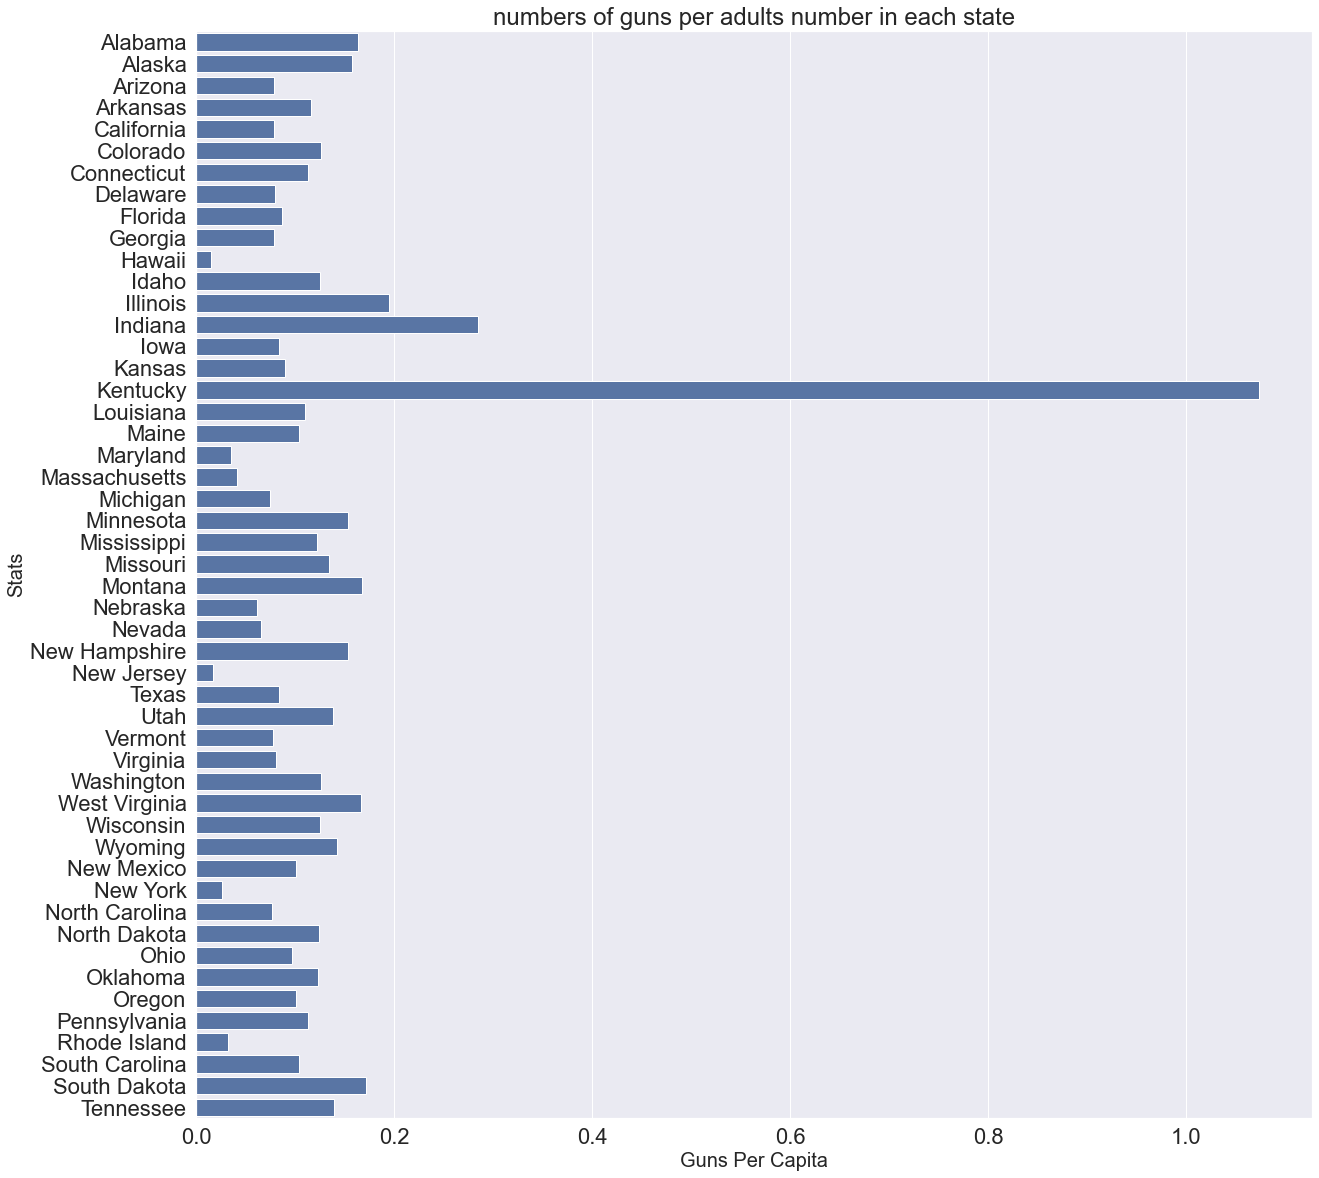

In [38]:
sns.set_color_codes("pastel")
sns.set(rc={'figure.figsize':(20,20)},font_scale= 2)
sns.barplot(x="gun_per_capita", y=analyse.index, data=analyse,label="q1", color="b",orient='h')
plt.xlabel('Guns Per Capita', fontsize=20)
plt.ylabel('Stats', fontsize=20)
plt.title("numbers of guns per adults number in each state")
sns.set_theme()
plt.show()

<span style="color:red"><font size="4"><b>Findings</font></span>
    
>Each state is different from the other, For example, Kentucky is almost 4 time as much as the second state Indiana.

### Research Question 2  ( what is the relation between economy and education and the number of guns?)

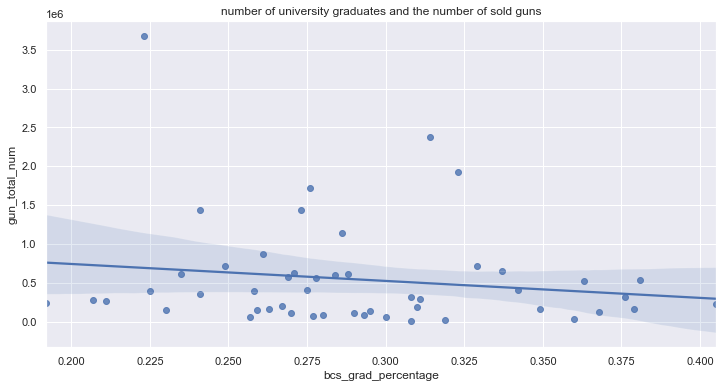

In [39]:
sns.set(rc={'figure.figsize':(12,6)},font_scale= 1)
sns.regplot(x = analyse['bcs_grad_percentage'], y = analyse['gun_total_num'])
plt.xlabel('bcs_grad_percentage', fontsize=12)
plt.ylabel('gun_total_num', fontsize=12)
plt.title("number of university graduates and the number of sold guns")
sns.set_theme()
plt.show()

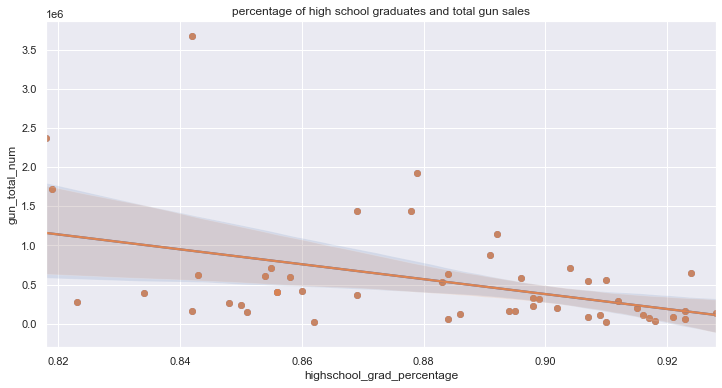

In [40]:
sns.regplot(x = analyse['highschool_grad_percentage'], y = analyse['gun_total_num'])
sns.set(rc={'figure.figsize':(12,6)},font_scale= 1)
sns.regplot(x = analyse['highschool_grad_percentage'], y = analyse['gun_total_num'])
plt.xlabel('highschool_grad_percentage', fontsize=12)
plt.ylabel('gun_total_num', fontsize=12)
plt.title("percentage of high school graduates and total gun sales")
sns.set_theme()
plt.show()

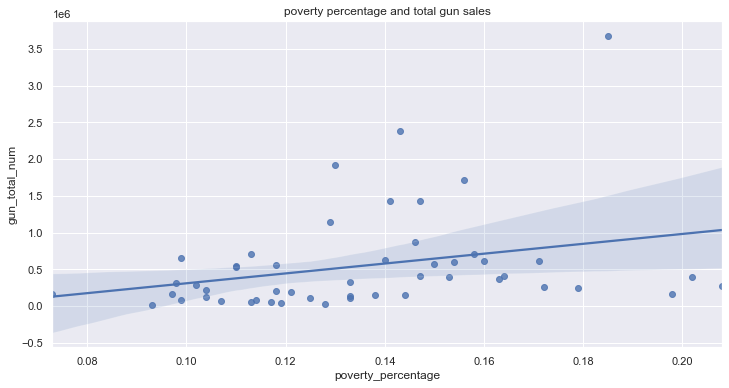

In [41]:
sns.set(rc={'figure.figsize':(12,6)},font_scale= 1)
sns.regplot(x = analyse['poverty_percentage'], y = analyse['gun_total_num'])
plt.xlabel('poverty_percentage', fontsize=12)
plt.ylabel('gun_total_num', fontsize=12)
plt.title("poverty percentage and total gun sales")
sns.set_theme()
plt.show()

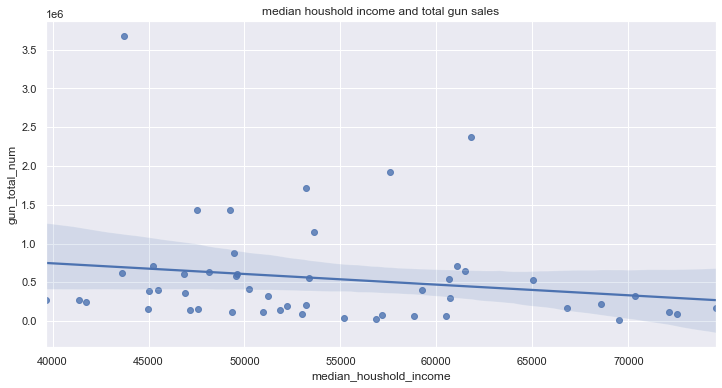

In [42]:
sns.set(rc={'figure.figsize':(12,6)},font_scale= 1)
sns.regplot(x = analyse['median_houshold_income'], y = analyse['gun_total_num'])
plt.xlabel('median_houshold_income', fontsize=12)
plt.ylabel('gun_total_num', fontsize=12)
plt.title("median houshold income and total gun sales")
sns.set_theme()
plt.show()

<span style="color:red"><font size="4"><b>Findings</font></span>
>The graphs show there are a negative correlation between total guns and education and a positive one with poverty.

<a id='conclusions'></a>
## Conclusions

> The graphes illustrates the different total guns in each state, and how some social parameters correlate with the number of guns.


## Limitation
> The data used from the two datasets were only from the year 2016 and the rest were disregarded.

> There were no null values or imbalanced data.

### A note specifying which dataset you analyzed
FBI Gun Data
### A statement of the question(s) you posed
What is the number of guns to the number of adults, over 18, in each state?
What is the relation between economy and education and the number of guns?
### A description of what you did to investigate those questions
Q1) I started by multiplying the percentage of adults by the population estimate then deviding the result
by the totla gun of each state, lastly, ploting the state and result column using a bar chart.
Q2) I used seaborn to plot a scatterplot to show the relation between ( highschool grads, university grads, poverty, and median household income) and total guns.
### Documentation of any data wrangling you did
using only the data from 2016 from both dataframes, then join both dataframes into one as shown above.
### Summary statistics and plots communicating your final results
in the conclustions

### References
https://stackoverflow.com/

https://www.kaggle.com/

https://www.reddit.com/

https://slack.com/intl/en-eg/

https://pandas.pydata.org/docs/

https://seaborn.pydata.org/